In [2]:
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from numpy.lib.stride_tricks import sliding_window_view

my_cmap = sns.light_palette("Navy", as_cmap=True)

In [3]:
df = pd.read_csv('dataset_mood_smartphone.csv')

In [4]:
# Percentage of unique values per column
for col in df.columns[1:]:
    uniques_prc = len(df[col].unique()) / len(df[col])
    print('column: {} - percentage: {:.3f}'.format(col, uniques_prc))
    print()

column: id - percentage: 0.000

column: time - percentage: 0.894

column: variable - percentage: 0.000

column: value - percentage: 0.347



In [5]:
# NaN values per column
df.isnull().sum(axis = 0)
df.dropna()

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.000
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.000
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.000
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.000
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...,...
376907,2770399,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
376908,2772465,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
376909,2774026,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
376910,2774133,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


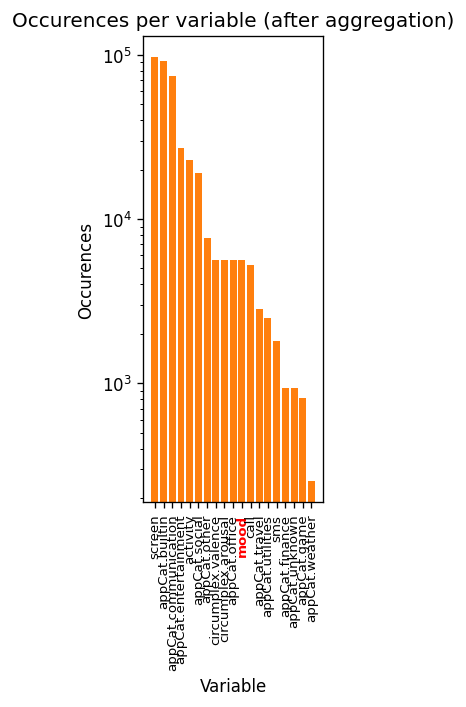

In [6]:
# Obtain variables and their count
variables_cnt = df.groupby(['variable']).count()
variables = variables_cnt.index.values
variables_cnt = variables_cnt.values[:,0]

# Sorting
p = variables_cnt.argsort()
variables_cnt = np.flip(variables_cnt[p])
variables = np.flip(variables[p])

# Simple bar plot
fig = plt.figure(figsize=(4,6), dpi=120)
ax1 = fig.add_subplot(1, 2, 1)

ax1.bar(variables, variables_cnt, width=0.8)
ax1.set_yscale('log')
ax1.set_axisbelow(True)
ax1.grid(which='major')

plt.xticks(rotation=90, fontsize = 8)
ax1.get_xticklabels()[10].set_color("red")
ax1.get_xticklabels()[10].set_weight("bold")
ax1.set_xlabel('Variable')
ax1.set_ylabel('Occurences')
ax1.set_title('Occurences per variable \n (before aggregation)')

ax1.bar(variables, variables_cnt, width=0.8)
ax1.set_axisbelow(True)
ax1.grid(which='major')

plt.xticks(rotation=90, fontsize = 8)
ax1.set_xlabel('Variable')
ax1.set_ylabel('Occurences')
ax1.set_title('Occurences per variable (after aggregation)')

plt.tight_layout()
plt.savefig('opv_ba.png', dpi=250)

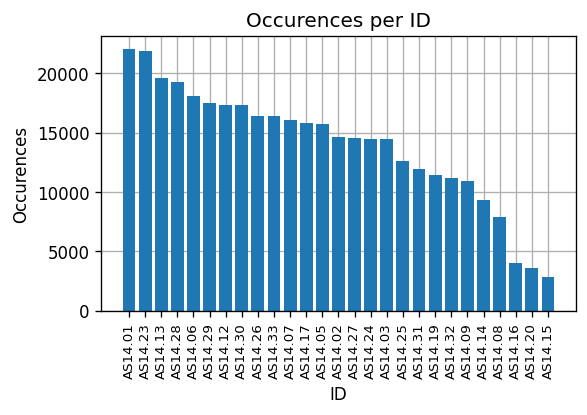

In [7]:
# Obtain variables and their count
id_cnt = df.groupby(['id']).count()
ids = id_cnt.index.values
id_cnt = id_cnt.values[:,0]

# Sorting
p = id_cnt.argsort()
id_cnt = np.flip(id_cnt[p])
ids = np.flip(ids[p])

# Simple bar plot
fig = plt.figure(figsize=(5,6), dpi=120)
ax = fig.add_subplot(2, 1, 1)

ax.bar(ids, id_cnt, width=0.8)
ax.set_axisbelow(True)
ax.grid(which='major')

plt.xticks(rotation=90, fontsize = 8)
ax.set_xlabel('ID')
ax.set_ylabel('Occurences')
ax.set_title('Occurences per ID')

plt.tight_layout()
plt.show()
print(my_cmap)

In [9]:
df_all = pd.read_csv('out_allsub.csv')
df_all = df_all.drop(['time', 'Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [7]:
# Obtain variables and their count
variables_cnt = df.groupby(['variable']).count()
variables = variables_cnt.index.values
variables_cnt = variables_cnt.values[:,0]

# Sorting
p = variables_cnt.argsort()
variables_cnt = np.flip(variables_cnt[p])
variables = np.flip(variables[p])

# Obtain variables and their count
variables1_cnt = np.array(df_all.notnull().sum())
variables1 = df_all.columns

# Sorting
p1 = variables1_cnt.argsort()
variables1_cnt = np.flip(variables1_cnt[p1])
variables1 = np.flip(variables1[p1])

# Simple bar plot
fig, ax1 = plt.subplots(figsize=(12,8), nrows=1, ncols=2, sharey=True)
# ax1 = fig.add_subplot(nrows=1, ncols=2)

# for i in range(len(ax1)):
ax1[0].bar(variables, variables_cnt, width=0.8)
ax1[1].bar(variables1, variables1_cnt, width=0.8)
ax1[0].grid(which='major', zorder=-1)
ax1[1].grid(which='major', zorder=-1)
ax1[0].set_yscale('log')

ax1[1].set_xticklabels(labels=variables1, rotation=90, fontsize = 14)
ax1[0].set_xticklabels(labels=variables, rotation=90, fontsize = 14)
ax1[0].tick_params(axis='both', labelsize=14)
ax1[1].tick_params(axis='both', labelsize=14)
ax1[0].set_title('Before Aggregation', size=19, pad=12)
ax1[1].set_title('After Aggregation', size=19, pad=12)


fig.suptitle('Occurrences per Variable', size=21)
fig.supxlabel('Variable', size=15)
fig.supylabel('Occurnces', size=15)
plt.tight_layout()
plt.savefig('opv.png', dpi=250)
plt.show()

NameError: name 'df_all' is not defined

/tmp/ipykernel_9672/2725515482.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1[1].set_xticklabels(labels=ids1, rotation=90, fontsize = 14)
/tmp/ipykernel_9672/2725515482.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1[0].set_xticklabels(labels=ids, rotation=90, fontsize = 14)


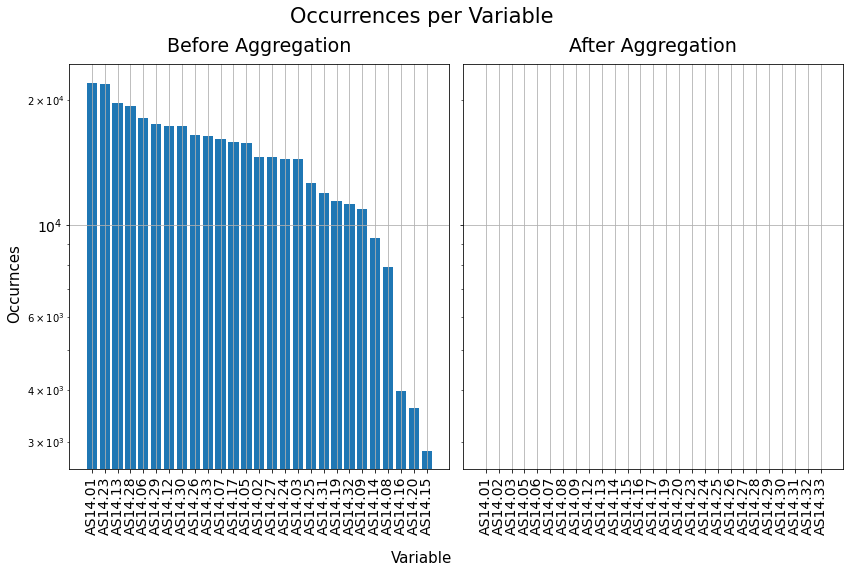

[113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113]
[21999 21852 19592 19276 18092 17499 17311 17279 16403 16390 16045 15826
 15745 14581 14575 14430 14425 12589 11889 11397 11193 10886  9286  7902
  3982  3620  2848]


In [6]:
# Obtain variables and their count
id_cnt = df.groupby(['id']).count()
ids = id_cnt.index.values
id_cnt = id_cnt.values[:,0]

# Sorting
p = id_cnt.argsort()
id_cnt = np.flip(id_cnt[p])
ids = np.flip(ids[p])

id1_cnt = []
ids1 = []
files = sorted(glob.glob('per_person_data/*.csv'))
for f in files:
    df_id = pd.read_csv(f)
    id1_cnt.append(df_id.shape[0])
    ids1.append(f[20:-4])

# Simple bar plot
fig, ax1 = plt.subplots(figsize=(12,8), nrows=1, ncols=2, sharey=True)
# ax1 = fig.add_subplot(nrows=1, ncols=2)

# for i in range(len(ax1)):
ax1[0].bar(ids, id_cnt, width=0.8)
ax1[1].bar(ids1, id1_cnt, width=0.8)
ax1[0].grid(which='major', zorder=-1)
ax1[1].grid(which='major', zorder=-1)
ax1[0].set_yscale('log')

ax1[1].set_xticklabels(labels=ids1, rotation=90, fontsize = 14)
ax1[0].set_xticklabels(labels=ids, rotation=90, fontsize = 14)
ax1[0].tick_params(axis='both', labelsize=14)
ax1[1].tick_params(axis='both', labelsize=14)
ax1[0].set_title('Before Aggregation', size=19, pad=12)
ax1[1].set_title('After Aggregation', size=19, pad=12)


fig.suptitle('Occurrences per Variable', size=21)
fig.supxlabel('Variable', size=15)
fig.supylabel('Occurnces', size=15)
plt.tight_layout()
# plt.savefig('opv.png', dpi=250)
plt.show()
print(id1_cnt)
print(id_cnt)

In [8]:
import missingno as msno

fig = plt.figure(figsize=(10, 6))
# axs = plt.subplots((2,1))
msno.dendrogram(df_all)

plt.title('Variable Nullity Correlation', size=34)
plt.ylabel('Correlation Coefficient', size=32, labelpad=20)
plt.xticks(size=30)

plt.tight_layout()
plt.show()

NameError: name 'df_all' is not defined

<Figure size 720x432 with 0 Axes>

In [10]:
df_all = df_all[df_all['mood'].notna()]

for col in df_all.columns:
    prc_nan = df_all[col].isnull().sum() / len(df_all[col])
    
    if prc_nan < .4:
        df_all[col] = df_all[col].fillna(df_all[col].median())
        # pass
    else:
        df_all = df_all.drop([col], axis=1)
df_all

,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.other,appCat.social,circumplex.arousal,circumplex.valence,mood,screen
7,0.095634,12.433222,38.594780,48.245667,12.053000,54.139183,-0.250000,0.750000,6.250000,65.300069
8,0.095634,12.433222,38.594780,48.245667,12.053000,54.139183,0.000000,0.333333,6.333333,65.300069
26,0.134050,14.269173,55.095526,53.024000,29.968875,75.141667,0.200000,0.200000,6.200000,153.665872
27,0.236880,7.781160,51.697063,46.662000,14.020429,36.636000,0.600000,0.500000,6.400000,47.613651
28,0.142741,12.134396,53.442031,31.448667,12.137167,50.046611,0.200000,0.800000,6.800000,67.067644
...,...,...,...,...,...,...,...,...,...,...
3037,0.012704,8.545776,59.382943,62.347000,17.835750,50.259100,-0.600000,0.400000,6.200000,113.607750
3038,0.103301,9.590398,37.238750,43.907571,27.891895,99.281685,0.000000,1.200000,8.200000,113.657683
3039,0.169354,6.452161,54.388125,68.369000,9.734000,198.880222,-1.333333,1.000000,7.000000,118.978033
3040,0.192901,14.776845,46.412278,37.174286,10.522000,75.390690,-0.800000,-0.400000,6.800000,86.342245


In [1]:
# Plot the correlation heatmap of all features.

df_corr = df_all.corr('pearson')
msk = np.triu(np.ones_like(df_corr))

plt.figure(figsize=(16, 6)) 
ax = heatmap = sns.heatmap(df_corr, mask=msk, vmin=-1, vmax=1, annot=True, cmap='BrBG')

ax.get_xticklabels()[-2].set_color("red")
ax.get_yticklabels()[-2].set_color("red")
ax.get_xticklabels()[-2].set_weight("bold")
ax.get_yticklabels()[-2].set_weight("bold")
# ax.set_xticklabels(ax.get_xticklabels()[-2], rotation=0, weight='bold', size=12)

heatmap.set_title('Spearman Correlation for all variables', fontdict={'fontsize':12}, pad=12)

NameError: name 'df_all' is not defined

In [ ]:
print(['{}: {}'.format(col, df_all[col].std()) for col in df_all.columns])

<Figure size 1500x1000 with 0 Axes>

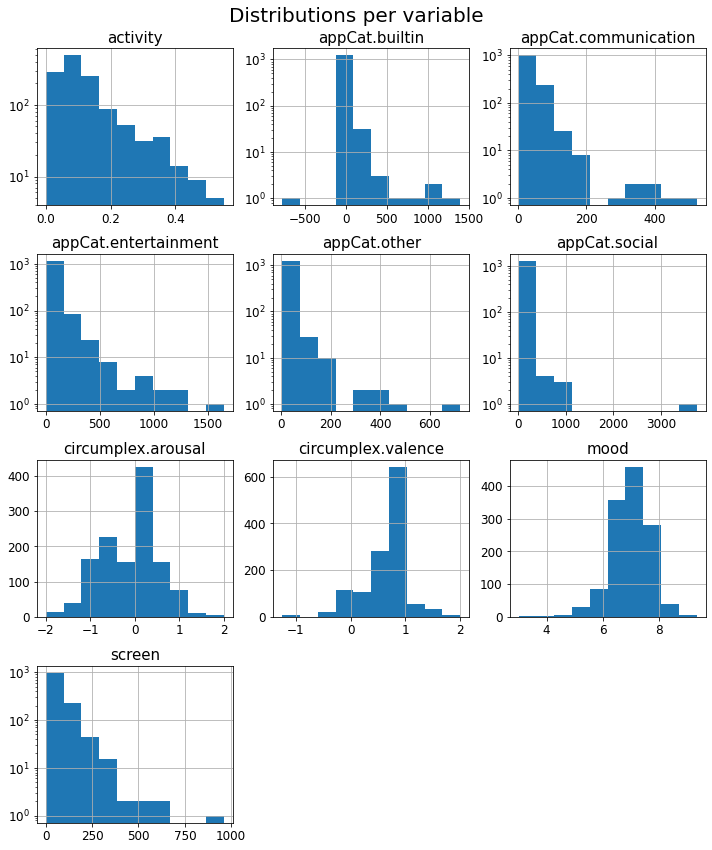

In [49]:
from scipy.stats import shapiro


fig = plt.figure(dpi=250)
axs = df_all.hist(figsize=(10,12))
axs[0][0].set_yscale('log')
axs[0][1].set_yscale('log')
axs[0][2].set_yscale('log')
axs[1][0].set_yscale('log')
axs[1][1].set_yscale('log')
axs[1][2].set_yscale('log')
axs[3][0].set_yscale('log')

for row in axs:
    for col in row:
        col.tick_params(labelsize=12)
        col.title.set_size(15)

plt.suptitle('Distributions per variable', size=20)
plt.tight_layout()
plt.savefig('dist_var.png', dpi=250)
plt.show()

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

def data_generator(data):
    _, w = data.shape

    shape = (6,w)
    new_data = sliding_window_view(data, shape)
    n, *_ = new_data.shape
    new_data = new_data.reshape((n,6,w))
    return new_data

def transform_data(arr):
    y_arr = arr[:,-2]
    x_arr = np.delete(arr, 2, axis=1)
    return x_arr, y_arr

data = df_all.values
X, y = transform_data(data)
y = y.reshape(-1,1)
y.shape
X.shape


In [ ]:
from skfeature.function.similarity_based import fisher_score

		     
score = fisher_score.fisher_score(X, y.ravel())
score